# PREPARING DATA FOR CASSADRA

In [12]:
import pandas as pd


In [20]:
csv_file_path = "/home/hduser/Downloads/ProjectTweets.csv"
column_names =['Id','Tweet_id','Date','No_Querry','User','Tweet']


data = pd.read_csv(csv_file_path, names=column_names)
data.columns = column_names

In [21]:
data.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [22]:
comma_count = data['Tweet'].str.count(',').sum()
print(f'Total number of commas in tweets: {comma_count}')

Total number of commas in tweets: 486760


In [23]:
data['Tweet'] = data['Tweet'].str.replace(',', '')
comma_count = data['Tweet'].str.count(',').sum()
print(f'Total number of commas in tweets: {comma_count}')

Total number of commas in tweets: 0


In [27]:
#pip install python-dateutil

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
from dateutil import parser

data['Date'] = data['Date'].apply(lambda x: parser.parse(x))

/usr/lib/python3/dist-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [29]:
data.head()

,Id,Tweet_id,Date,No_Querry,User,Tweet
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,@switchfoot http://twitpic.com/2y1zl - Awww th...
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,@nationwideclass no it's not behaving at all. ...


In [31]:
# counting rows -checking if entire data was loaded
data['No_Querry'].count()

1600000

In [32]:
# dropping unnecessary coulmn
data.drop(columns=['No_Querry'], inplace=True)
data.head()

,Id,Tweet_id,Date,User,Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,@switchfoot http://twitpic.com/2y1zl - Awww th...
1,1,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,2009-04-06 22:19:57,Karoli,@nationwideclass no it's not behaving at all. ...


In [33]:
downloads_path = os.path.expanduser('/home/hduser/Downloads')

In [34]:
# saving corrected data to csv file

#csv_file_path = os.path.join(downloads_path, 'data.csv')
#data.to_csv(csv_file_path, index=False)

#print(f'Data saved to {csv_file_path}')

Data saved to /home/hduser/Downloads/data.csv


# Loading data from cassandra

In [140]:
from pyspark.sql import SparkSession

In [141]:
# creating a Spark session to read data from Cassandra with specified configurations

spark = SparkSession.builder \
    .appName('CassandraToSpark') \
    .config('spark.cassandra.connection.host', 'localhost') \
    .config('spark.jars.packages', 'com.datastax.spark:spark-cassandra-connector_2.11:3.1.0') \
    .getOrCreate()




cassandra_host = spark.conf.get('spark.cassandra.connection.host')
print("Cassandra Host:", cassandra_host)


spark = SparkSession.builder \
    .appName("CassandraSparkIntegration") \
    .getOrCreate()

cassandra_cluster = Cluster(['127.0.0.1'], port=9042)
session = cassandra_cluster.connect()

keyspace = 'tweeter_data'  
session.set_keyspace(keyspace)

cql_query = "SELECT * FROM tweets LIMIT 5"
rows = session.execute(cql_query)

In [142]:
# printing the Cassandra host address obtained from Spark configurations

cassandra_host = spark.conf.get('spark.cassandra.connection.host')
print("Cassandra Host:", cassandra_host)

Cassandra Host: localhost


In [157]:
from pyspark.sql import SparkSession
from cassandra.cluster import Cluster

In [144]:
spark = SparkSession.builder \
    .appName("CassandraSparkIntegration") \
    .getOrCreate()

In [145]:
cassandra_cluster = Cluster(['127.0.0.1'], port=9042)
session = cassandra_cluster.connect()

In [146]:
# setting the keyspace to 'tweeter_data' in the Cassandra session.

keyspace = 'tweeter_data'  
session.set_keyspace(keyspace)

In [10]:
cql_query = "SELECT * FROM tweets LIMIT 5"
rows = session.execute(cql_query)

In [13]:
df = spark.createDataFrame(rows)
df.head()

Row(id=302602, date=datetime.datetime(2009, 6, 1, 19, 37, 16), tweet='Had problems with my eyes all day. This sux! ', tweet_id=1999088121, user='Bobina11')

In [14]:
from pyspark.sql.functions import col

# Select and alias the fields
new_df = df.select(
    col("id").alias("ID"),
    col("date").alias("Date"),
    col("tweet").alias("Tweet"),
    col("tweet_id").alias("Tweet_ID"),
    col("user").alias("User")
)

# Show the new DataFrame
new_df.show()

+-------+-------------------+--------------------+----------+---------------+
|     ID|               Date|               Tweet|  Tweet_ID|           User|
+-------+-------------------+--------------------+----------+---------------+
| 302602|2009-06-01 19:37:16|Had problems with...|1999088121|       Bobina11|
| 531141|2009-06-16 12:10:07|don't fall unless...|2196209437|rosie_carter427|
|1416569|2009-06-06 13:00:30|Nice afternoon fo...|2057439493|     zuluranger|
| 693077|2009-06-20 06:42:25|miss you batang K...|2252644159| chocomallows19|
|   4317|2009-04-07 03:45:16|Oh no  more babys...|1468791098|       tynie626|
+-------+-------------------+--------------------+----------+---------------+



In [21]:
new_df.describe().show()
print("Number of rows:", new_df.count())

+-------+-----------------+--------------------+-------------------+----------+
|summary|               ID|               Tweet|           Tweet_ID|      User|
+-------+-----------------+--------------------+-------------------+----------+
|  count|                5|                   5|                  5|         5|
|   mean|         589541.2|                null|     1.9948344616E9|      null|
| stddev|529841.1780847163|                null|3.113184963800409E8|      null|
|    min|             4317|Had problems with...|         1468791098|  Bobina11|
|    max|          1416569|miss you batang K...|         2252644159|zuluranger|
+-------+-----------------+--------------------+-------------------+----------+

Number of rows: 5


#### Filtering Data

In [22]:
filtered_df = new_df.filter(new_df.User == "Bobina11")
filtered_df.show()

+------+-------------------+--------------------+----------+--------+
|    ID|               Date|               Tweet|  Tweet_ID|    User|
+------+-------------------+--------------------+----------+--------+
|302602|2009-06-01 19:37:16|Had problems with...|1999088121|Bobina11|
+------+-------------------+--------------------+----------+--------+



#### Aggregation

In [23]:
from pyspark.sql import functions as F

agg_df = new_df.groupBy("User").agg(F.count("ID").alias("TweetCount"))
agg_df.show()

+---------------+----------+
|           User|TweetCount|
+---------------+----------+
|rosie_carter427|         1|
|       Bobina11|         1|
|       tynie626|         1|
|     zuluranger|         1|
| chocomallows19|         1|
+---------------+----------+



### Loading full data set from Cassandra table

In [15]:
import time

In [17]:
# Start the timer
start_time = time.time()

# Your code to pull data from Cassandra
cql_query = "SELECT * FROM tweets"
rows = session.execute(cql_query)
df = spark.createDataFrame(rows)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data retrieval took {elapsed_time:.2f} seconds")

Data retrieval took 65.68 seconds


In [18]:
df.head()

2023-10-24 12:55:57,165 WARN scheduler.TaskSetManager: Stage 3 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


Row(id=302602, date=datetime.datetime(2009, 6, 1, 19, 37, 16), tweet='Had problems with my eyes all day. This sux! ', tweet_id=1999088121, user='Bobina11')

In [19]:
# Select and alias the fields
full_df = df.select(
    col("id").alias("ID"),
    col("date").alias("Date"),
    col("tweet").alias("Tweet"),
    col("tweet_id").alias("Tweet_ID"),
    col("user").alias("User")
)

# Show the new DataFrame
full_df.show()

2023-10-24 12:56:01,099 WARN scheduler.TaskSetManager: Stage 4 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+-------+-------------------+--------------------+----------+---------------+
|     ID|               Date|               Tweet|  Tweet_ID|           User|
+-------+-------------------+--------------------+----------+---------------+
| 302602|2009-06-01 19:37:16|Had problems with...|1999088121|       Bobina11|
| 531141|2009-06-16 12:10:07|don't fall unless...|2196209437|rosie_carter427|
|1416569|2009-06-06 13:00:30|Nice afternoon fo...|2057439493|     zuluranger|
| 693077|2009-06-20 06:42:25|miss you batang K...|2252644159| chocomallows19|
|   4317|2009-04-07 03:45:16|Oh no  more babys...|1468791098|       tynie626|
| 927961|2009-05-10 19:06:23|@sayitwithecards ...|1759389622|        Muse4u2|
| 313395|2009-06-02 01:55:11|i'm pooping mysel...|2001742430|   _amberlovely|
|1133667|2009-05-30 16:50:08|@Ladiejay I lik t...|1976213404|        iamword|
|1347669|2009-06-05 09:37:16|jewwcrew reunion!...|2044631753|        SPBobo2|
|1191314|2009-05-31 13:59:13|    At baccalareate |1983864195| oh

# Data Preprocessing & EDA

In [45]:
row_count = full_df.count()
print("Number of rows in full_df:", row_count)

2023-10-23 21:32:21,991 WARN scheduler.TaskSetManager: Stage 74 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


Number of rows in full_df: 1600000


In [30]:
column_data_types = full_df.dtypes
for column, data_type in column_data_types:
    print(f"Column '{column}' has data type '{data_type}'")

Column 'ID' has data type 'bigint'
Column 'Date' has data type 'timestamp'
Column 'Tweet' has data type 'string'
Column 'Tweet_ID' has data type 'bigint'
Column 'User' has data type 'string'


In [130]:
from pyspark.sql.functions import date_format

# Extract the time component from the 'Date' column
full_df = full_df.withColumn("Time", date_format("Date", "HH:mm:ss"))

# Show the updated DataFrame
full_df.show()

2023-10-25 16:51:09,612 WARN scheduler.TaskSetManager: Stage 131 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-25 16:51:19,350 WARN scheduler.TaskSetManager: Stage 132 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|      TokenizedTweet|     SentimentScores|SentimentScore|
+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|   769|2009-04-06|@faithgg45  this ...|1468000996|     sambg7777|00:00:00|[@, faithgg45, co...|{'neg': 0.0, 'neu...|        0.2235|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|00:00:00|[working, papers,...|{'neg': 0.0, 'neu...|        0.3182|
|801621|2009-04-06| @teknetia thanks!! |1468103125|       _gnosis|00:00:00|[@, teknetia, tha...|{'neg': 0.0, 'neu...|        0.5399|
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|00:00:00|[psp, browser, fi...|{'neg': 0.0, 'neu...|           0.0|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|00:

In [131]:
# Extract the date component from the 'Date' column
full_df = full_df.withColumn("Date", date_format("Date", "yyyy-MM-dd"))

# Show the updated DataFrame
full_df.show()

2023-10-25 16:51:43,297 WARN scheduler.TaskSetManager: Stage 134 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-25 16:51:52,997 WARN scheduler.TaskSetManager: Stage 135 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|      TokenizedTweet|     SentimentScores|SentimentScore|
+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|   769|2009-04-06|@faithgg45  this ...|1468000996|     sambg7777|00:00:00|[@, faithgg45, co...|{'neg': 0.0, 'neu...|        0.2235|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|00:00:00|[working, papers,...|{'neg': 0.0, 'neu...|        0.3182|
|801621|2009-04-06| @teknetia thanks!! |1468103125|       _gnosis|00:00:00|[@, teknetia, tha...|{'neg': 0.0, 'neu...|        0.5399|
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|00:00:00|[psp, browser, fi...|{'neg': 0.0, 'neu...|           0.0|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|00:

In [132]:
# Sort the DataFrame by date in ascending order (oldest to newest)
full_df = full_df.orderBy("Date")

# Show the sorted DataFrame
full_df.show()

2023-10-25 16:52:37,468 WARN scheduler.TaskSetManager: Stage 137 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|      TokenizedTweet|     SentimentScores|SentimentScore|
+------+----------+--------------------+----------+--------------+--------+--------------------+--------------------+--------------+
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|00:00:00|[psp, browser, fi...|{'neg': 0.0, 'neu...|           0.0|
|   363|2009-04-06|@sara_kate im afr...|1467901437|      Arneenxx|00:00:00|[@, sara_kate, im...|{'neg': 0.0, 'neu...|           0.0|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|00:00:00|[@, larryczerwonk...|{'neg': 0.0, 'neu...|        0.6249|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|00:00:00|[working, papers,...|{'neg': 0.0, 'neu...|        0.3182|
|800536|2009-04-06|@kcarruthers *fli...|1467918315|     SilkCharm|00:

### Number of tweets per day

In [62]:
from pyspark.sql.functions import count

# Group by the 'Date' column and count the number of tweets for each day
tweets_per_day = full_df.groupBy("Date").agg(count("ID").alias("TweetsCount"))

# Sort the result by date in ascending order (chronological order)
tweets_per_day = tweets_per_day.orderBy("Date")

# Show the result
#tweets_per_day.show()

# Save it as a new DataFrame
df_day = tweets_per_day

# Show the result
df_day.show()

2023-10-23 22:10:37,969 WARN scheduler.TaskSetManager: Stage 124 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+
|      Date|TweetsCount|
+----------+-----------+
|2009-04-06|       3360|
|2009-04-07|      17311|
|2009-04-17|       3084|
|2009-04-18|      21754|
|2009-04-19|      27469|
|2009-04-20|      18460|
|2009-04-21|       8587|
|2009-05-01|       7716|
|2009-05-02|      27434|
|2009-05-03|      35333|
|2009-05-04|      15481|
|2009-05-09|      11739|
|2009-05-10|      26029|
|2009-05-11|       4186|
|2009-05-13|       4066|
|2009-05-14|      17460|
|2009-05-16|       9146|
|2009-05-17|      40154|
|2009-05-18|      36469|
|2009-05-21|       2132|
+----------+-----------+
only showing top 20 rows



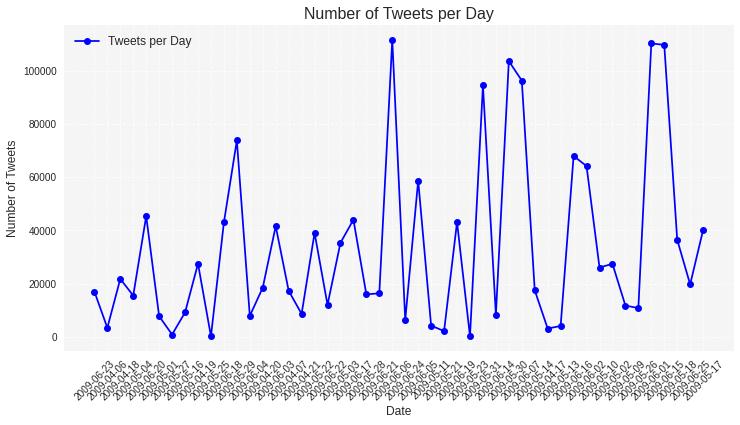

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
tweets_per_day_pd = tweets_per_day.toPandas()

# Set a professional style for the plot
plt.style.use('seaborn')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(tweets_per_day_pd['Date'], tweets_per_day_pd['TweetsCount'], marker='o', linestyle='-', color='b', label='Tweets per Day')

# Title and labels
ax.set_title('Number of Tweets per Day', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Tweets', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Legend
ax.legend(fontsize=12)

# Add a background color to the plot
ax.set_facecolor('whitesmoke')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

2023-10-23 23:09:52,259 WARN scheduler.TaskSetManager: Stage 174 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


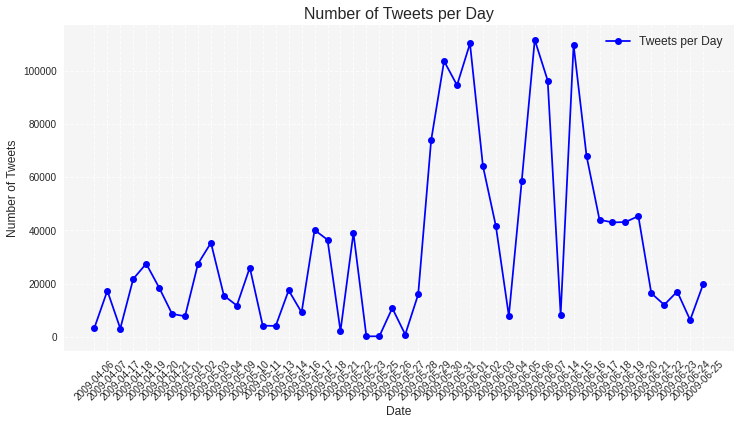

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by date in ascending order
tweets_per_day_sorted = tweets_per_day.orderBy("Date")

# Convert the Spark DataFrame to a Pandas DataFrame
tweets_per_day_pd = tweets_per_day_sorted.toPandas()

# Set a professional style for the plot
plt.style.use('seaborn')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(tweets_per_day_pd['Date'], tweets_per_day_pd['TweetsCount'], marker='o', linestyle='-', color='b', label='Tweets per Day')

# Title and labels
ax.set_title('Number of Tweets per Day', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Tweets', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Legend
ax.legend(fontsize=12)

# Add a background color to the plot
ax.set_facecolor('whitesmoke')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [134]:
print(type(df_day))

NameError: name 'df_day' is not defined

In [68]:
first_date= df_day.select('Date').first()
print("First Row:", first_date)

# Show the last row
last_date= df_day.select('Date').orderBy(df_day['Date'], ascending=False).first()
print("Last Row:", last_date)

2023-10-23 22:14:25,263 WARN scheduler.TaskSetManager: Stage 130 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


First Row: Row(Date='2009-04-06')


2023-10-23 22:14:32,819 WARN scheduler.TaskSetManager: Stage 132 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


Last Row: Row(Date='2009-06-25')


In [135]:
from datetime import datetime, timedelta
from pyspark.sql.types import StructType, StructField, DateType


# Define the start and end dates as strings
start_date_str = '2009-04-06'
end_date_str = '2009-06-25'

# Convert the start and end date strings to datetime objects
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

# Create an empty list to store the date objects
date_list = []

# Generate a list of dates
current_date = start_date
while current_date <= end_date:
    date_list.append((current_date,))
    current_date += timedelta(days=1)

# Define the schema for the Date DataFrame
schema = StructType([StructField("Date", DateType(), False)])

# Create the Date DataFrame
date_df = spark.createDataFrame(date_list, schema=schema)

# Show the Date DataFrame
date_df.show()


+----------+
|      Date|
+----------+
|2009-04-06|
|2009-04-07|
|2009-04-08|
|2009-04-09|
|2009-04-10|
|2009-04-11|
|2009-04-12|
|2009-04-13|
|2009-04-14|
|2009-04-15|
|2009-04-16|
|2009-04-17|
|2009-04-18|
|2009-04-19|
|2009-04-20|
|2009-04-21|
|2009-04-22|
|2009-04-23|
|2009-04-24|
|2009-04-25|
+----------+
only showing top 20 rows



In [132]:
# Perform a left join between date_df and df_day
result_df = date_df.join(df_day, "Date", "left")

# Sort the result DataFrame by date
result_df = result_df.orderBy("Date")

# Show the sorted result DataFrame
result_df.show()

2023-10-23 23:52:41,238 WARN scheduler.TaskSetManager: Stage 254 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+
|      Date|TweetsCount|
+----------+-----------+
|2009-04-06|       3360|
|2009-04-07|      17311|
|2009-04-08|       null|
|2009-04-09|       null|
|2009-04-10|       null|
|2009-04-11|       null|
|2009-04-12|       null|
|2009-04-13|       null|
|2009-04-14|       null|
|2009-04-15|       null|
|2009-04-16|       null|
|2009-04-17|       3084|
|2009-04-18|      21754|
|2009-04-19|      27469|
|2009-04-20|      18460|
|2009-04-21|       8587|
|2009-04-22|       null|
|2009-04-23|       null|
|2009-04-24|       null|
|2009-04-25|       null|
+----------+-----------+
only showing top 20 rows



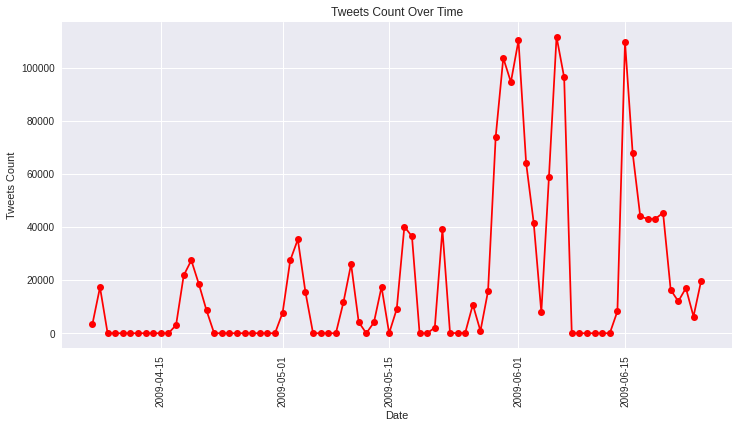

In [91]:
result_df_pandas = result_df.toPandas()

# Fill null values in 'TweetsCount' with 0
result_df_pandas['TweetsCount'].fillna(0, inplace=True)

# Plot the line chart with red color
plt.figure(figsize=(12, 6))
plt.plot(result_df_pandas['Date'], result_df_pandas['TweetsCount'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Tweets Count')
plt.title('Tweets Count Over Time')

# Rotate x-axis labels by 90 degrees and display each x tick
plt.xticks(rotation=90)
plt.grid(True)

# Display the chart
plt.show()

In [98]:
from pyspark.sql.functions import isnull

# Count the number of days with values
days_with_values = result_df.filter(~isnull("TweetsCount")).count()

# Count the number of days with null values
days_with_nulls = result_df.filter(isnull("TweetsCount")).count()

# Calculate the ratio of days with values to days with null values
ratio = days_with_values / days_with_nulls

print(f"Number of days with values: {days_with_values}")
print(f"Number of days with null values: {days_with_nulls}")
print(f"Ratio of days with values to days with null values: {ratio}")

2023-10-23 23:18:53,590 WARN scheduler.TaskSetManager: Stage 189 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-23 23:19:06,799 WARN scheduler.TaskSetManager: Stage 194 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


Number of days with values: 48
Number of days with null values: 33
Ratio of days with values to days with null values: 1.4545454545454546


In [119]:
import plotly.express as px


# Create a DataFrame
data = pd.DataFrame({'Category': ['Days with Tweets', 'Days without'], 'Count': [days_with_values, days_with_nulls]})

# Define custom colors
colors = ['green', 'lightgray']

# Create an interactive 3D pie chart
fig = px.pie(data, names='Category', values='Count', title='Distribution of Days with Tweets and Without')
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])  

# Customize colors
fig.update_traces(marker=dict(colors=colors))
# Show the interactive 3D pie chart
fig.show()

In [133]:
from pyspark.sql.functions import date_format

result_df_with_day_of_week = result_df.withColumn("DayOfWeekName", date_format("Date", "EEEE"))

# show the result
result_df_with_day_of_week.show()

2023-10-23 23:54:33,697 WARN scheduler.TaskSetManager: Stage 258 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+-----------+-------------+
|      Date|TweetsCount|DayOfWeekName|
+----------+-----------+-------------+
|2009-04-06|       3360|       Monday|
|2009-04-07|      17311|      Tuesday|
|2009-04-08|       null|    Wednesday|
|2009-04-09|       null|     Thursday|
|2009-04-10|       null|       Friday|
|2009-04-11|       null|     Saturday|
|2009-04-12|       null|       Sunday|
|2009-04-13|       null|       Monday|
|2009-04-14|       null|      Tuesday|
|2009-04-15|       null|    Wednesday|
|2009-04-16|       null|     Thursday|
|2009-04-17|       3084|       Friday|
|2009-04-18|      21754|     Saturday|
|2009-04-19|      27469|       Sunday|
|2009-04-20|      18460|       Monday|
|2009-04-21|       8587|      Tuesday|
|2009-04-22|       null|    Wednesday|
|2009-04-23|       null|     Thursday|
|2009-04-24|       null|       Friday|
|2009-04-25|       null|     Saturday|
+----------+-----------+-------------+
only showing top 20 rows



2023-10-24 00:00:31,880 WARN scheduler.TaskSetManager: Stage 261 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


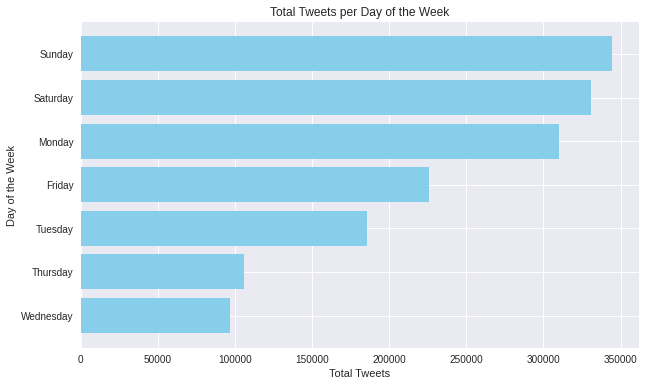

2023-10-24 04:28:49,440 WARN spark.HeartbeatReceiver: Removing executor driver with no recent heartbeats: 15245777 ms exceeds timeout 120000 ms
2023-10-24 11:28:43,381 WARN spark.SparkContext: Killing executors is not supported by current scheduler.
2023-10-24 11:28:44,322 WARN executor.Executor: Issue communicating with driver in heartbeater
java.lang.NullPointerException
	at org.apache.spark.storage.memory.MemoryStore.getSize(MemoryStore.scala:131)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$getCurrentBlockStatus(BlockManager.scala:815)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3(BlockManager.scala:571)
	at org.apache.spark.storage.BlockManager.$anonfun$reportAllBlocks$3$adapted(BlockManager.scala:570)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.storage.BlockManage

In [138]:
from pyspark.sql.functions import sum, col, coalesce, lit



grouped_df = result_df_with_day_of_week.withColumn("TweetsCount", coalesce(col("TweetsCount"), lit(0)).cast("int")) \
    .groupBy("DayOfWeekName") \
    .agg(sum("TweetsCount").alias("TotalTweets"))

# sortting the results by "TotalTweets" in descending order
grouped_df = grouped_df.orderBy("TotalTweets", ascending=False)

# converting to Pandas DataFrame for plotting
grouped_pandas = grouped_df.toPandas()

# creating the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_pandas["DayOfWeekName"], grouped_pandas["TotalTweets"], color='skyblue')
plt.xlabel("Total Tweets")
plt.ylabel("Day of the Week")
plt.title("Total Tweets per Day of the Week")
plt.gca().invert_yaxis()  +
plt.show()


#### Checking number of tweets per hour

In [139]:
import plotly.express as px
from pyspark.sql.functions import hour

# extracting the hour from the "Time" column
full_df = full_df.withColumn("Hour", hour("Time"))

# grouping the data by hour and count the number of tweets per hour
hourly_tweets = full_df.groupBy("Hour").count()

# sorting the data by hour
hourly_tweets = hourly_tweets.sort("Hour")

# converting the Spark DataFrame to a Pandas DataFrame
hourly_tweets_pd = hourly_tweets.toPandas()

# creating an interactive bar chart using Plotly
fig = px.bar(
    hourly_tweets_pd,
    x="Hour",
    y="count",
    title="Number of Tweets per Hour",
    labels={"Hour": "Hour of the Day", "count": "Number of Tweets"},
)

# customizing the x-axis labels (from 0 to 23)
fig.update_xaxes(tickvals=list(range(24)), ticktext=[str(i) for i in range(24)])

# showing the interactive plot
fig.show()

2023-10-24 11:31:02,439 WARN scheduler.TaskSetManager: Stage 272 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


#### Checing users

In [140]:
# groupping by the "User" column and count the number of tweets for each user
user_tweet_counts = full_df.groupBy("User").agg(count("ID").alias("TweetCount"))

# filtering users with more than one tweet
users_with_multiple_tweets = user_tweet_counts.filter(col("TweetCount") > 1)

# showing the users with multiple tweets
users_with_multiple_tweets.show()


2023-10-24 11:34:59,759 WARN scheduler.TaskSetManager: Stage 277 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+---------------+----------+
|           User|TweetCount|
+---------------+----------+
|  lllittlefield|         3|
|     Freddy1990|        10|
|randomsupergirl|        15|
|   DionneLBrown|         2|
|    Rachecullen|        31|
|   BoriMischief|         2|
|  vinyayavieiel|         5|
| ilovejamesryan|         5|
|    Izzy_Cullen|        13|
|      kateblogs|        75|
| richardescobar|        10|
|      epstudios|         6|
|        Merlene|        14|
|    galovesongs|         3|
|     moggypurrs|         3|
|     shalinique|         9|
|  cassieewassie|        24|
|      teufl0302|        38|
|       Louisa_Y|         2|
|       marlinex|         5|
+---------------+----------+
only showing top 20 rows



In [141]:
# sorting users by the number of their tweets
sorted_users = users_with_multiple_tweets.orderBy("TweetCount", ascending=False)

# showing the sorted users
sorted_users.show()

2023-10-24 11:46:59,689 WARN scheduler.TaskSetManager: Stage 279 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+---------------+----------+
|           User|TweetCount|
+---------------+----------+
|       lost_dog|       549|
|        webwoke|       345|
|       tweetpet|       310|
|SallytheShizzle|       281|
|    VioletsCRUK|       279|
|    mcraddictal|       276|
|       tsarnick|       248|
|    what_bugs_u|       246|
|    Karen230683|       238|
|      DarkPiano|       236|
|   SongoftheOss|       227|
|      Jayme1988|       225|
|         keza34|       219|
| ramdomthoughts|       216|
|      shanajaca|       213|
|         wowlew|       212|
|   TraceyHewins|       211|
|     nuttychris|       211|
|   thisgoeshere|       207|
|     Spidersamm|       205|
+---------------+----------+
only showing top 20 rows



# Sentiment Analysis

### Text preprocessing

In [25]:
import nltk
nltk.download()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [24]:
# changing all text to lower case in Tweet column

text_data = full_df.select("Tweet").rdd.flatMap(lambda x: x).collect()

# lowercase the text
lowercased_data = [text.lower() for text in text_data]

# checking lowercased data
print(lowercased_data[:5])

2023-10-24 12:57:47,424 WARN scheduler.TaskSetManager: Stage 8 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 12:58:00,845 WARN scheduler.TaskSetManager: Stage 9 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


["@faithgg45  this computer doesn't have shockwave...blah  no account yet", 'working papers - what the original order called flying rolls &amp; we call &quot;aerodynamic biscuits&quot;  - also available. http://bit.ly/bss7b #wbc2', '@teknetia thanks!! ', 'on my psp browser for the first time in over a year ', '@larryczerwonka cool changing avatar u got there. nice quotes too ']


In [27]:
from pyspark.sql.functions import col, lower, udf

# Convert text to lowercase
full_df = full_df.withColumn("Tweet", lower(col("Tweet")))

In [29]:
full_df.show()

2023-10-24 15:28:01,904 WARN scheduler.TaskSetManager: Stage 12 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|
+------+----------+--------------------+----------+--------------+--------+
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|22:43:05|
|   363|2009-04-06|@sara_kate im afr...|1467901437|      Arneenxx|22:43:48|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|23:53:37|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|23:23:55|
|800536|2009-04-06|@kcarruthers *fli...|1467918315|     SilkCharm|22:48:28|
|801669|2009-04-06|waiting for the p...|1468116586|   twilight_x3|23:48:16|
|  1193|2009-04-06|it just makes me ...|1468102926| ShannaMoakler|23:43:45|
|   769|2009-04-06|@faithgg45  this ...|1468000996|     sambg7777|23:11:56|
|    53|2009-04-06|put vacation phot...|1467821338|   justnetgirl|22:22:30|
|  1199|2009-04-06|ugh. still workin...|1468106339|        Syph0n|23:44:55|
|   987|2009

In [34]:
# Tokenize the text
tokenize_udf = udf(lambda text: word_tokenize(text), ArrayType(StringType()))
full_df = full_df.withColumn("TokenizedTweet", tokenize_udf(col("Tweet")))
full_df.show()

2023-10-24 15:41:06,443 WARN scheduler.TaskSetManager: Stage 13 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 15:41:14,924 WARN scheduler.TaskSetManager: Stage 14 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+--------------------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|      TokenizedTweet|
+------+----------+--------------------+----------+--------------+--------+--------------------+
|   769|2009-04-06|@faithgg45  this ...|1468000996|     sambg7777|23:11:56|[@, faithgg45, th...|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|23:23:55|[working, papers,...|
|801621|2009-04-06| @teknetia thanks!! |1468103125|       _gnosis|23:43:49|[@, teknetia, tha...|
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|22:43:05|[on, my, psp, bro...|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|23:53:37|[@, larryczerwonk...|
|800536|2009-04-06|@kcarruthers *fli...|1467918315|     SilkCharm|22:48:28|[@, kcarruthers, ...|
|  1199|2009-04-06|ugh. still workin...|1468106339|        Syph0n|23:44:55|[ugh, ., still, w...|
|    23|2009-04-06|this week i

In [35]:
# Remove stop words
stop_words = set(stopwords.words("english"))
stop_words_udf = udf(lambda words: [word for word in words if word not in stop_words], ArrayType(StringType()))
full_df = full_df.withColumn("TokenizedTweet", stop_words_udf(col("TokenizedTweet")))

full_df.show()

2023-10-24 15:42:31,333 WARN scheduler.TaskSetManager: Stage 16 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 15:42:39,333 WARN scheduler.TaskSetManager: Stage 17 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------+----------+--------------+--------+--------------------+
|    ID|      Date|               Tweet|  Tweet_ID|          User|    Time|      TokenizedTweet|
+------+----------+--------------------+----------+--------------+--------+--------------------+
|   769|2009-04-06|@faithgg45  this ...|1468000996|     sambg7777|23:11:56|[@, faithgg45, co...|
|801251|2009-04-06|working papers - ...|1468040032|   fieldsbooks|23:23:55|[working, papers,...|
|801621|2009-04-06| @teknetia thanks!! |1468103125|       _gnosis|23:43:49|[@, teknetia, tha...|
|800409|2009-04-06|on my psp browser...|1467898845|        REV3AL|22:43:05|[psp, browser, fi...|
|801810|2009-04-06|@larryczerwonka c...|1468132429|      nabejero|23:53:37|[@, larryczerwonk...|
|800536|2009-04-06|@kcarruthers *fli...|1467918315|     SilkCharm|22:48:28|[@, kcarruthers, ...|
|  1199|2009-04-06|ugh. still workin...|1468106339|        Syph0n|23:44:55|[ugh, ., still, w...|
|    23|2009-04-06|this week i

### keeping punktuaction in tweets

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, expr


In [38]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment for a given text
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return str(sentiment_scores)

In [39]:
# Register the UDF for sentiment analysis
analyze_sentiment_udf = udf(analyze_sentiment, StringType())

# Apply sentiment analysis to the "Tweet" column and store the results in a new column
full_df = full_df.withColumn("SentimentScores", analyze_sentiment_udf(full_df["Tweet"]))

# Show the DataFrame with sentiment scores
full_df.select("ID", "Date", "Tweet", "SentimentScores").show(truncate=False)

2023-10-24 16:03:44,045 WARN scheduler.TaskSetManager: Stage 19 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 16:03:51,343 WARN scheduler.TaskSetManager: Stage 20 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------+
|ID    |Date      |Tweet                                                                                                                                                   |SentimentScores                                                |
+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------+
|769   |2009-04-06|@faithgg45  this computer doesn't have shockwave...blah  no account yet                                                                                 |{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.2235}   |
|801251|2009-04-06|working papers - what the origina

In [42]:
# Show the DataFrame with sentiment scores, excluding the "Tweet" column
full_df.select("ID", "Date", "Time","User","SentimentScores").show(truncate=False)

2023-10-24 16:08:47,425 WARN scheduler.TaskSetManager: Stage 28 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 16:08:57,699 WARN scheduler.TaskSetManager: Stage 29 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------+--------------+---------------------------------------------------------------+
|ID    |Date      |Time    |User          |SentimentScores                                                |
+------+----------+--------+--------------+---------------------------------------------------------------+
|769   |2009-04-06|23:11:56|sambg7777     |{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.2235}   |
|801251|2009-04-06|23:23:55|fieldsbooks   |{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.3182}   |
|801621|2009-04-06|23:43:49|_gnosis       |{'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5399}   |
|800409|2009-04-06|22:43:05|REV3AL        |{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          |
|801810|2009-04-06|23:53:37|nabejero      |{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.6249}   |
|800536|2009-04-06|22:48:28|SilkCharm     |{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          |
|1199  |2009-04-06|23:44:55|

In [127]:
from pyspark.sql.functions import col, regexp_extract

# extracting the "compound" value using regular expression
full_df = full_df.withColumn("SentimentScore", regexp_extract(col("SentimentScores"), "compound': (-?\d+\.\d+)", 1))


# creating a new DataFrame with selected columns
sentiment = full_df.select("Date", "Time","User","SentimentScore")

# showing the updated DataFrame
sentiment.show(truncate=False)

2023-10-25 16:47:14,298 WARN scheduler.TaskSetManager: Stage 128 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-25 16:47:25,778 WARN scheduler.TaskSetManager: Stage 129 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+--------+--------------+--------------+
|Date      |Time    |User          |SentimentScore|
+----------+--------+--------------+--------------+
|2009-04-06|23:11:56|sambg7777     |0.2235        |
|2009-04-06|23:23:55|fieldsbooks   |0.3182        |
|2009-04-06|23:43:49|_gnosis       |0.5399        |
|2009-04-06|22:43:05|REV3AL        |0.0           |
|2009-04-06|23:53:37|nabejero      |0.6249        |
|2009-04-06|22:48:28|SilkCharm     |0.0           |
|2009-04-06|23:44:55|Syph0n        |-0.4215       |
|2009-04-06|22:20:40|viJILLante    |0.3818        |
|2009-04-06|22:27:02|ashleyirvin   |0.6249        |
|2009-04-06|23:03:31|zottarella    |0.4019        |
|2009-04-06|23:06:05|Nasef         |-0.7845       |
|2009-04-06|23:21:45|lcmroz        |-0.1531       |
|2009-04-06|22:58:28|kayocean      |0.6588        |
|2009-04-06|23:48:16|twilight_x3   |0.0           |
|2009-04-06|23:43:45|ShannaMoakler |0.7896        |
|2009-04-06|22:22:30|justnetgirl   |-0.2263       |
|2009-04-06|

In [56]:
# extracting the "compound" value using regular expression
full_df = full_df.withColumn("SentimentScore", regexp_extract(col("SentimentScores"), "compound': (-?\d+\.\d+)", 1))

# creating a new DataFrame with selected columns
sentiment_df = full_df.select("ID", "Date", "SentimentScore")

# showing the updated DataFrame
sentiment_df.show(truncate=False)

2023-10-24 16:46:45,546 WARN scheduler.TaskSetManager: Stage 46 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 16:46:52,455 WARN scheduler.TaskSetManager: Stage 47 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------+
|ID    |Date      |SentimentScore|
+------+----------+--------------+
|769   |2009-04-06|0.2235        |
|801251|2009-04-06|0.3182        |
|801621|2009-04-06|0.5399        |
|800409|2009-04-06|0.0           |
|801810|2009-04-06|0.6249        |
|800536|2009-04-06|0.0           |
|1199  |2009-04-06|-0.4215       |
|23    |2009-04-06|0.3818        |
|114   |2009-04-06|0.6249        |
|800831|2009-04-06|0.4019        |
|660   |2009-04-06|-0.7845       |
|893   |2009-04-06|-0.1531       |
|800730|2009-04-06|0.6588        |
|801669|2009-04-06|0.0           |
|1193  |2009-04-06|0.7896        |
|53    |2009-04-06|-0.2263       |
|987   |2009-04-06|0.3716        |
|878   |2009-04-06|-0.5255       |
|800006|2009-04-06|0.0           |
|110   |2009-04-06|-0.296        |
+------+----------+--------------+
only showing top 20 rows



In [59]:
from pyspark.sql.functions import avg

# Group by the "Date" column and calculate the average sentiment score for each day
daily_avg_sentiment = sentiment_df.groupBy("Date").agg(avg("SentimentScore").alias("AvgSentiment"))

# Sort the DataFrame by date in ascending order
daily_avg_sentiment = daily_avg_sentiment.orderBy("Date")

# Show the sorted DataFrame
daily_avg_sentiment.show(truncate=False)

2023-10-24 16:55:58,280 WARN scheduler.TaskSetManager: Stage 62 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 16:56:05,459 WARN scheduler.TaskSetManager: Stage 63 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+-------------------+
|Date      |AvgSentiment       |
+----------+-------------------+
|2009-04-06|0.14082729166666685|
|2009-04-07|0.16071425683091506|
|2009-04-17|0.19615564202334584|
|2009-04-18|0.1795865633906382 |
|2009-04-19|0.1831807564891344 |
|2009-04-20|0.17166360780064724|
|2009-04-21|0.17376012577151456|
|2009-05-01|0.17529110938309955|
|2009-05-02|0.1791365568272937 |
|2009-05-03|0.17146325248351602|
|2009-05-04|0.16226765712809077|
|2009-05-09|0.18079954851350183|
|2009-05-10|0.21161643167236285|
|2009-05-11|0.1639054706163401 |
|2009-05-13|0.14147299557304477|
|2009-05-14|0.1657088201603655 |
|2009-05-16|0.1725657992565051 |
|2009-05-17|0.19965720725208472|
|2009-05-18|0.18654729496284728|
|2009-05-21|0.17546547842401505|
+----------+-------------------+
only showing top 20 rows



In [60]:
from pyspark.sql.functions import round

# Round the "AvgSentiment" column to 2 decimal places
daily_avg_sentiment = daily_avg_sentiment.withColumn("AvgSentiment", round(col("AvgSentiment"), 2))

# Show the DataFrame with rounded average sentiment scores
daily_avg_sentiment.show(truncate=False)

2023-10-24 17:02:56,338 WARN scheduler.TaskSetManager: Stage 66 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:03:04,108 WARN scheduler.TaskSetManager: Stage 67 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+------------+
|Date      |AvgSentiment|
+----------+------------+
|2009-04-06|0.14        |
|2009-04-07|0.16        |
|2009-04-17|0.2         |
|2009-04-18|0.18        |
|2009-04-19|0.18        |
|2009-04-20|0.17        |
|2009-04-21|0.17        |
|2009-05-01|0.18        |
|2009-05-02|0.18        |
|2009-05-03|0.17        |
|2009-05-04|0.16        |
|2009-05-09|0.18        |
|2009-05-10|0.21        |
|2009-05-11|0.16        |
|2009-05-13|0.14        |
|2009-05-14|0.17        |
|2009-05-16|0.17        |
|2009-05-17|0.2         |
|2009-05-18|0.19        |
|2009-05-21|0.18        |
+----------+------------+
only showing top 20 rows



### removing punctuation

In [61]:
from pyspark.sql.functions import regexp_replace

# Remove punctuation from the "TokenizedTweet" column and create a new DataFrame
cleaned_full_df = full_df.withColumn("TokenizedTweet", regexp_replace(col("TokenizedTweet"), r'[^\w\s]', ''))

# Show the cleaned DataFrame
cleaned_full_df.show(truncate=False)

2023-10-24 17:17:46,293 ERROR codegen.CodeGenerator: failed to compile: org.codehaus.commons.compiler.CompileException: File 'generated.java', Line 104, Column 1: Assignment conversion not possible from type "org.apache.spark.sql.catalyst.util.ArrayData" to type "org.apache.spark.unsafe.types.UTF8String"
org.codehaus.commons.compiler.CompileException: File 'generated.java', Line 104, Column 1: Assignment conversion not possible from type "org.apache.spark.sql.catalyst.util.ArrayData" to type "org.apache.spark.unsafe.types.UTF8String"
	at org.codehaus.janino.UnitCompiler.compileError(UnitCompiler.java:12021)
	at org.codehaus.janino.UnitCompiler.assignmentConversion(UnitCompiler.java:10851)
	at org.codehaus.janino.UnitCompiler.compile2(UnitCompiler.java:3839)
	at org.codehaus.janino.UnitCompiler.access$6100(UnitCompiler.java:226)
	at org.codehaus.janino.UnitCompiler$13.visitAssignment(UnitCompiler.java:3799)
	at org.codehaus.janino.UnitCompiler$13.visitAssignment(UnitCompiler.java:3779)


+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+----------+--------------+--------+-----------------------------------------------------------+---------------------------------------------------------------+--------------+
|ID    |Date      |Tweet                                                                                                                                                   |Tweet_ID  |User          |Time    |TokenizedTweet                                             |SentimentScores                                                |SentimentScore|
+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+----------+--------------+--------+-----------------------------------------------------------+---------------------------------------

In [62]:
# Register the UDF for sentiment analysis
analyze_sentiment_udf = udf(analyze_sentiment, StringType())

# Apply sentiment analysis to the "Tweet" column and store the results in a new column
cleaned_full_df = cleaned_full_df.withColumn("SentimentScores", analyze_sentiment_udf(full_df["Tweet"]))

# Show the DataFrame with sentiment scores
cleaned_full_df.select("ID", "Date", "Tweet", "SentimentScores").show(truncate=False)

2023-10-24 17:25:03,383 WARN scheduler.TaskSetManager: Stage 73 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:25:11,917 WARN scheduler.TaskSetManager: Stage 74 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------+
|ID    |Date      |Tweet                                                                                                                                                   |SentimentScores                                                |
+------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------+
|769   |2009-04-06|@faithgg45  this computer doesn't have shockwave...blah  no account yet                                                                                 |{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.2235}   |
|801251|2009-04-06|working papers - what the origina

In [63]:
# Show the DataFrame with sentiment scores, excluding the "Tweet" column
cleaned_full_df.select("ID", "Date", "Time","User","SentimentScores").show(truncate=False)

2023-10-24 17:27:02,922 WARN scheduler.TaskSetManager: Stage 76 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:27:15,300 WARN scheduler.TaskSetManager: Stage 77 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+------+----------+--------+--------------+---------------------------------------------------------------+
|ID    |Date      |Time    |User          |SentimentScores                                                |
+------+----------+--------+--------------+---------------------------------------------------------------+
|769   |2009-04-06|23:11:56|sambg7777     |{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.2235}   |
|801251|2009-04-06|23:23:55|fieldsbooks   |{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.3182}   |
|801621|2009-04-06|23:43:49|_gnosis       |{'neg': 0.0, 'neu': 0.223, 'pos': 0.777, 'compound': 0.5399}   |
|800409|2009-04-06|22:43:05|REV3AL        |{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          |
|801810|2009-04-06|23:53:37|nabejero      |{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.6249}   |
|800536|2009-04-06|22:48:28|SilkCharm     |{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}          |
|1199  |2009-04-06|23:44:55|

In [70]:
# extracting the "compound" value using regular expression
cleaned_full_df = cleaned_full_df.withColumn("SentimentScore", regexp_extract(col("SentimentScores"), "compound': (-?\d+\.\d+)", 1))

# creating a new DataFrame with selected columns
sentiment_df2 = cleaned_full_df.select("ID", "Date", "SentimentScore")

# Group by the "Date" column and calculate the average sentiment score for each day
daily_avg_sentiment2 = sentiment_df2.groupBy("Date").agg(avg("SentimentScore").alias("AvgSentiment2"))

# Sort the DataFrame by date in ascending order
daily_avg_sentiment2 = daily_avg_sentiment2.orderBy("Date")

# Round the "AvgSentiment" column to 2 decimal places
daily_avg_sentiment2= daily_avg_sentiment2.withColumn("AvgSentiment2", round(col("AvgSentiment2"), 2))

# Show the DataFrame with rounded average sentiment scores
daily_avg_sentiment2.show(truncate=False)

2023-10-24 17:43:21,343 WARN scheduler.TaskSetManager: Stage 83 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:43:30,276 WARN scheduler.TaskSetManager: Stage 84 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+-------------+
|Date      |AvgSentiment2|
+----------+-------------+
|2009-04-06|0.14         |
|2009-04-07|0.16         |
|2009-04-17|0.2          |
|2009-04-18|0.18         |
|2009-04-19|0.18         |
|2009-04-20|0.17         |
|2009-04-21|0.17         |
|2009-05-01|0.18         |
|2009-05-02|0.18         |
|2009-05-03|0.17         |
|2009-05-04|0.16         |
|2009-05-09|0.18         |
|2009-05-10|0.21         |
|2009-05-11|0.16         |
|2009-05-13|0.14         |
|2009-05-14|0.17         |
|2009-05-16|0.17         |
|2009-05-17|0.2          |
|2009-05-18|0.19         |
|2009-05-21|0.18         |
+----------+-------------+
only showing top 20 rows



In [71]:

from pyspark.sql import functions as F

# Perform a left join
merged_df = daily_avg_sentiment.join(
    daily_avg_sentiment2,
    on=["Date"],
    how="left"
)

# Calculate the sentiment score difference
merged_df = merged_df.withColumn("SentimentDifference", F.col("AvgSentiment") - F.col("AvgSentiment2"))

# Show the merged DataFrame
merged_df.show()

2023-10-24 17:48:48,993 WARN scheduler.TaskSetManager: Stage 87 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:48:56,538 WARN scheduler.TaskSetManager: Stage 88 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:49:05,408 WARN scheduler.TaskSetManager: Stage 89 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:49:15,013 WARN scheduler.TaskSetManager: Stage 91 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 17:55:00,580 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1215.8 KiB
2023-10-24 17:55:00,702 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1215.8 KiB
2023-10-24 17:55:00,772 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1215.8 KiB
2023-10-24 17:55:01,067 WARN scheduler.DAGSch

+----------+------------+-------------+-------------------+
|      Date|AvgSentiment|AvgSentiment2|SentimentDifference|
+----------+------------+-------------+-------------------+
|2009-06-23|       -0.05|        -0.05|                0.0|
|2009-04-06|        0.14|         0.14|                0.0|
|2009-04-18|        0.18|         0.18|                0.0|
|2009-05-04|        0.16|         0.16|                0.0|
|2009-06-20|       -0.04|        -0.04|                0.0|
|2009-05-01|        0.18|         0.18|                0.0|
|2009-05-27|        0.13|         0.13|                0.0|
|2009-04-19|        0.18|         0.18|                0.0|
|2009-05-16|        0.17|         0.17|                0.0|
|2009-05-25|        0.18|         0.18|                0.0|
|2009-06-18|       -0.05|        -0.05|                0.0|
|2009-05-29|        0.18|         0.18|                0.0|
|2009-06-04|        0.16|         0.16|                0.0|
|2009-04-20|        0.17|         0.17| 

## Sentiment analysis

In [73]:
from pyspark.sql.functions import avg, round

# Calculate the average sentiment score for the entire dataset and round it to 4 decimal places
average_sentiment = sentiment_df.agg(round(avg("SentimentScore"), 4).alias("AverageSentiment"))

# Show the result
average_sentiment.show()

2023-10-24 19:28:10,818 WARN scheduler.TaskSetManager: Stage 113 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-24 19:28:18,341 WARN scheduler.TaskSetManager: Stage 114 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------------+
|AverageSentiment|
+----------------+
|          0.1399|
+----------------+



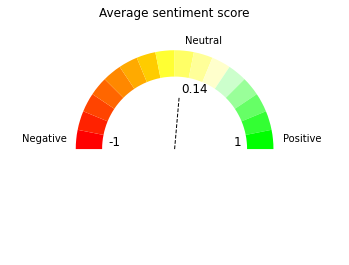

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Define the labels and corresponding values
labels = ['', 'Negative', '','','','','','','','Neutral','','','','','','', 'Positive']
values = [0.5, 0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,
         0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,0.03125,]

# Define the colors for each segment
colors = ['none', '#FF0000',  # Red
    '#FF2200',  
    '#FF4400',  
    '#FF6600',
    '#FF8800', 
    '#FFAA00', 
    '#FFCC00',  # Yellow
    '#FFFF33',
    '#FFFF66',
    '#FFFF99',
    '#FFFFCC',  
    '#CCFFCC',
    '#99FF99',
    '#66FF66',
    '#33FF33',
    '#00FF00' ]

# Create a pie chart with a 90-degree rotation
plt.pie(values, labels=labels, colors=colors, startangle=0, counterclock=False, radius=1.5, wedgeprops={'width': 0.4})

# Set the aspect ratio to ensure a circular shape
plt.axis('equal')

# Add a title and adjust the vertical position (y parameter)
plt.title('Average sentiment score', y=1.08)

# Annotate the specific value on the grey part
plt.annotate('', xy=(-0.5, 0), fontsize=12, color='black', ha='center', va='center')

# Adding a line from the center to the grey section at a 85 degree angle
grey_radius = 0.8  
angle = 85

# Calculate the coordinates for the line
x = [0, grey_radius * np.cos(np.radians(angle))]
y = [0, grey_radius * np.sin(np.radians(angle))]


plt.annotate('1', xy=(0.9, 0.05), fontsize=12, color='black')
plt.annotate('0.14', xy=(0.1, .85), fontsize=12, color='black')
#plt.annotate('-0.5', xy=(-0.5, .8), fontsize=12, color='black')
plt.annotate('-1', xy=(-1, 0.05), fontsize=12, color='black')

# Plot the line
plt.plot(x, y, color='black', linestyle='--', linewidth=1)

# Display the chart
plt.show()

In [125]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import adfuller

# Convert the column to a list
avg_sentiment_list = daily_avg_sentiment.select("AvgSentiment").rdd.flatMap(lambda x: x).collect()

# Convert the list to a NumPy array
avg_sentiment_values = np.array(avg_sentiment_list)

# Perform ADF test on the values
stationarity = adfuller(avg_sentiment_values)

# Interpret the result
print('Dickey Fuller p-value:', stationarity[1])

# Check for stationarity based on the p-value
if stationarity[1] <= 0.05:
    print('The data is likely stationary.')
else:
    print('The data is likely non-stationary.')

2023-10-25 16:03:39,590 WARN scheduler.TaskSetManager: Stage 117 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.
2023-10-25 16:04:17,766 WARN scheduler.TaskSetManager: Stage 118 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


Dickey Fuller p-value: 0.9435568095336734
The data is likely non-stationary.


### Creating data to save it into Cassandra

In [136]:
# Merge date_df with sentiment_df using a left join on the 'Date' column
Cassandra = date_df.join(sentiment_df, 'Date', 'left')
Cassandra.show()

2023-10-25 17:05:36,621 WARN scheduler.TaskSetManager: Stage 140 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+------+--------------+
|      Date|    ID|SentimentScore|
+----------+------+--------------+
|2009-05-13| 95058|        0.6199|
|2009-05-13|933726|        0.8701|
|2009-05-13|933073|        0.0772|
|2009-05-13|933904|        0.4927|
|2009-05-13| 96353|       -0.6858|
|2009-05-13| 96482|       -0.4215|
|2009-05-13|934039|        0.2885|
|2009-05-13|933159|           0.0|
|2009-05-13|935203|        0.8398|
|2009-05-13| 96545|        0.4576|
|2009-05-13|934643|       -0.2263|
|2009-05-13| 95288|       -0.5179|
|2009-05-13| 95800|        0.4588|
|2009-05-13|934008|         0.204|
|2009-05-13| 96712|           0.0|
|2009-05-13|934225|        0.3612|
|2009-05-13| 96641|         -0.34|
|2009-05-13|933471|        0.5707|
|2009-05-13| 95883|        0.2382|
|2009-05-13|933760|       -0.7506|
+----------+------+--------------+
only showing top 20 rows



In [138]:
# checking Cassandra table for row with not tweet (sentiment)

filtered_row = Cassandra.where(Cassandra['Date'] == '2009-04-08')
filtered_row.show()

2023-10-25 17:49:53,668 WARN scheduler.TaskSetManager: Stage 147 contains a task of very large size (175832 KiB). The maximum recommended task size is 1000 KiB.


+----------+----+--------------+
|      Date|  ID|SentimentScore|
+----------+----+--------------+
|2009-04-08|null|          null|
+----------+----+--------------+



In [167]:
spark = SparkSession.builder \
    .appName('CassandraToSpark') \
    .config('spark.cassandra.connection.host', 'localhost') \
    .config('spark.jars.packages', 'com.datastax.spark:spark-cassandra-connector_2.11:3.1.0') \
    .getOrCreate()


cassandra_host = spark.conf.get('spark.cassandra.connection.host')
print("Cassandra Host:", cassandra_host)


spark = SparkSession.builder \
    .appName("CassandraSparkIntegration") \
    .getOrCreate()

cassandra_cluster = Cluster(['127.0.0.1'], port=9042)
session = cassandra_cluster.connect()

keyspace = 'tweeter_data'  
session.set_keyspace(keyspace)

cql_query = "SELECT * FROM tweets LIMIT 5"
rows = session.execute(cql_query)

Cassandra Host: localhost


In [168]:
df2 = spark.createDataFrame(rows)
df2.head()

Row(id=302602, date=datetime.datetime(2009, 6, 1, 19, 37, 16), tweet='Had problems with my eyes all day. This sux! ', tweet_id=1999088121, user='Bobina11')

In [173]:
cql_query = "CREATE TABLE IF NOT EXISTS tweeter_data.test (Date DATE PRIMARY KEY, ID INT, SentimentScore FLOAT)"


In [183]:
# Define your CQL query
cql_query = "SELECT * FROM tweets LIMIT 10"

rows = session.execute(cql_query)

df2 = spark.createDataFrame(rows)
df2.head()

Row(id=302602, date=datetime.datetime(2009, 6, 1, 19, 37, 16), tweet='Had problems with my eyes all day. This sux! ', tweet_id=1999088121, user='Bobina11')

In [184]:
# Select and alias the fields
new_df2 = df2.select(
    col("id").alias("ID"),
    col("date").alias("Date"),
    col("tweet").alias("Tweet"),
    col("tweet_id").alias("Tweet_ID"),
    col("user").alias("User")
)

# Show the new DataFrame
new_df2.show()

+-------+-------------------+--------------------+----------+---------------+
|     ID|               Date|               Tweet|  Tweet_ID|           User|
+-------+-------------------+--------------------+----------+---------------+
| 302602|2009-06-01 19:37:16|Had problems with...|1999088121|       Bobina11|
| 531141|2009-06-16 12:10:07|don't fall unless...|2196209437|rosie_carter427|
|1416569|2009-06-06 13:00:30|Nice afternoon fo...|2057439493|     zuluranger|
| 693077|2009-06-20 06:42:25|miss you batang K...|2252644159| chocomallows19|
|   4317|2009-04-07 03:45:16|Oh no  more babys...|1468791098|       tynie626|
| 927961|2009-05-10 19:06:23|@sayitwithecards ...|1759389622|        Muse4u2|
| 313395|2009-06-02 01:55:11|i'm pooping mysel...|2001742430|   _amberlovely|
|1133667|2009-05-30 16:50:08|@Ladiejay I lik t...|1976213404|        iamword|
|1347669|2009-06-05 09:37:16|jewwcrew reunion!...|2044631753|        SPBobo2|
|1191314|2009-05-31 13:59:13|    At baccalareate |1983864195| oh

In [196]:
data = [(1, 'John', 30), (2, 'Alice', 28), (3, 'Bob', 35)]
columns = ['id', 'name', 'age']

df = spark.createDataFrame(data, columns)

In [197]:
### creating table in cassandra
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName('CassandraToSpark') \
    .config('spark.cassandra.connection.host', 'localhost') \
    .config('spark.jars.packages', 'com.datastax.spark:spark-cassandra-connector_2.11:3.1.0') \
    .getOrCreate()

# Define the Cassandra keyspace and table names
keyspace = "tweeter_data"
table = "table"



In [200]:

# Define the schema for your Cassandra table
# Replace the column names and data types with your own
schema = f"""
    CREATE TABLE IF NOT EXISTS {keyspace}.{table} (id INT,name TEXT,age INT,PRIMARY KEY (id INT))
"""

# Execute the CREATE TABLE statement
spark.sql(schema)

# Verify that the table has been created
spark.sql(f"DESCRIBE TABLE {keyspace}.{table}").show()

ParseException: 
mismatched input 'id' expecting INTEGER_VALUE(line 2, pos 89)

== SQL ==

    CREATE TABLE IF NOT EXISTS tweeter_data.table (id INT,name TEXT,age INT,PRIMARY KEY (id INT))
-----------------------------------------------------------------------------------------^^^
